# Python: Classification

## Diabetes Health Indicators in a sample of the american population


In [1]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

#### Intel Obtimizations for scikit-learn


In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Reading Dataset


In [3]:
# Importing dataset
data = pd.read_csv('./Dataset/diabetes_binary_health_indicators_BRFSS2015.csv')
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


##### Data description:

**Diabetes_012**: 0 = no diabetes; 1 = prediabetes; 2 = diabetes

**HighBP**: 0 = no high Blood Pressure; 1 = high Blood Pressure

**HighChol**: 0 = no high cholesterol; 1 = high cholesterol

**CholCheck**: 0 = no cholesterol check in 5 years; 1 = yes cholesterol check in 5 years

**BMI**: _Body Mass Index_

**Smoker**: _"Have you smoked at least 100 cigarettes in your entire life?" [Note: 5 packs = 100 cigarettes]_ 0 = no 1 = yes

**Stroke**: 0 = no; 1 = yes

**HeartDiseaseorAttack**: _coronary heart disease (CHD) or myocardial infarction (MI)_ 0 = no 1 = yes

**PhysActivity**: _physical activity in past 30 days - not including job_ 0 = no 1 = yes

**Fruits**: _Consume Fruit 1 or more times per day_ 0 = no; 1 = yes

**Veggies**: _Consume Vegetables 1 or more times per day_ 0 = no; 1 = yes

**HvyAlcoholConsumer**: _Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)_ 0 = no; 1 = yes

**AnyHealthcare**: _Have any kind of health care coverEducation, including health insurance, prepaid plans such as HMO, etc._ 0 = no 1; = yes

**NoDocbcCost**: _"Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?"_ 0 = no; 1 = yes

**GenHlth**: _"Would you say that in general your health is": scale 1-5_ 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor

**MentHlth**: _"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"_ scale of values 0-30

**PhysHlt**: _"Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?"_ scale of values 0-30

**DiffWalk**: _"Do you have serious difficulty walking or climbing stairs?"_ 0 = no 1 = yes

**Sex**: 0 = female; 1 = male

**Age**: _13-level HighBP category_ 1 = 18-24; ...; 9 = 60-64; 13 = 80 or older

**Education**: _Education level scale 1-6_ 1 = Never attended school or only kindergarten; 2 = Grades 1 through 8; ...;

**Income**: _Income scale scale 1-8_ 1 = less than $10,000; 5 = less than $35,000; 8 = $75,000 or more


In [4]:
# data description
data.drop("Diabetes_binary", axis=1).describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
# checking if there is any NULL data
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### Data Gathering


In [6]:
rs = 42
# zeros = data[data['Diabetes_012']==0]
# ones = data[data['Diabetes_012']==1]
# twos = data[data['Diabetes_012']==2]

# balanced_data = pd.concat([ones, zeros.sample(len(ones)), twos.sample(len(ones))]) Multiclass

zeros = data[data['Diabetes_binary']==0]
ones = data[data['Diabetes_binary']==1]

balanced_data = pd.concat([ones, zeros.sample(len(ones), random_state=rs)])
# balanced_data = pd.concat([ones.sample(500, random_state=rs), zeros.sample(500, random_state=rs)])
d2 = pd.concat([ones.sample(500, random_state=rs-1), zeros.sample(500, random_state=rs-1)])
label = balanced_data['Diabetes_binary']

# Data Normalization
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(balanced_data[:])
balanced_data[:] = scaled_d

scaled_d2 = scaler.fit_transform(d2[:])
d2[:] = scaled_d2

balanced_data.shape

(70692, 22)

In [7]:
d2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
121,1.0,0.0,0.0,1.0,0.171053,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.75,0.000000,0.333333,0.0,0.0,0.500000,1.0,0.857143
161346,1.0,0.0,1.0,1.0,0.105263,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.75,0.666667,0.133333,0.0,0.0,0.666667,0.6,0.285714
229841,1.0,1.0,0.0,1.0,0.486842,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.066667,0.000000,0.0,1.0,0.416667,0.8,0.714286
224380,1.0,1.0,0.0,1.0,0.263158,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.50,0.000000,0.233333,0.0,0.0,0.833333,0.8,1.000000
8601,1.0,1.0,1.0,1.0,0.144737,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.000000,0.033333,0.0,0.0,0.833333,0.8,0.714286


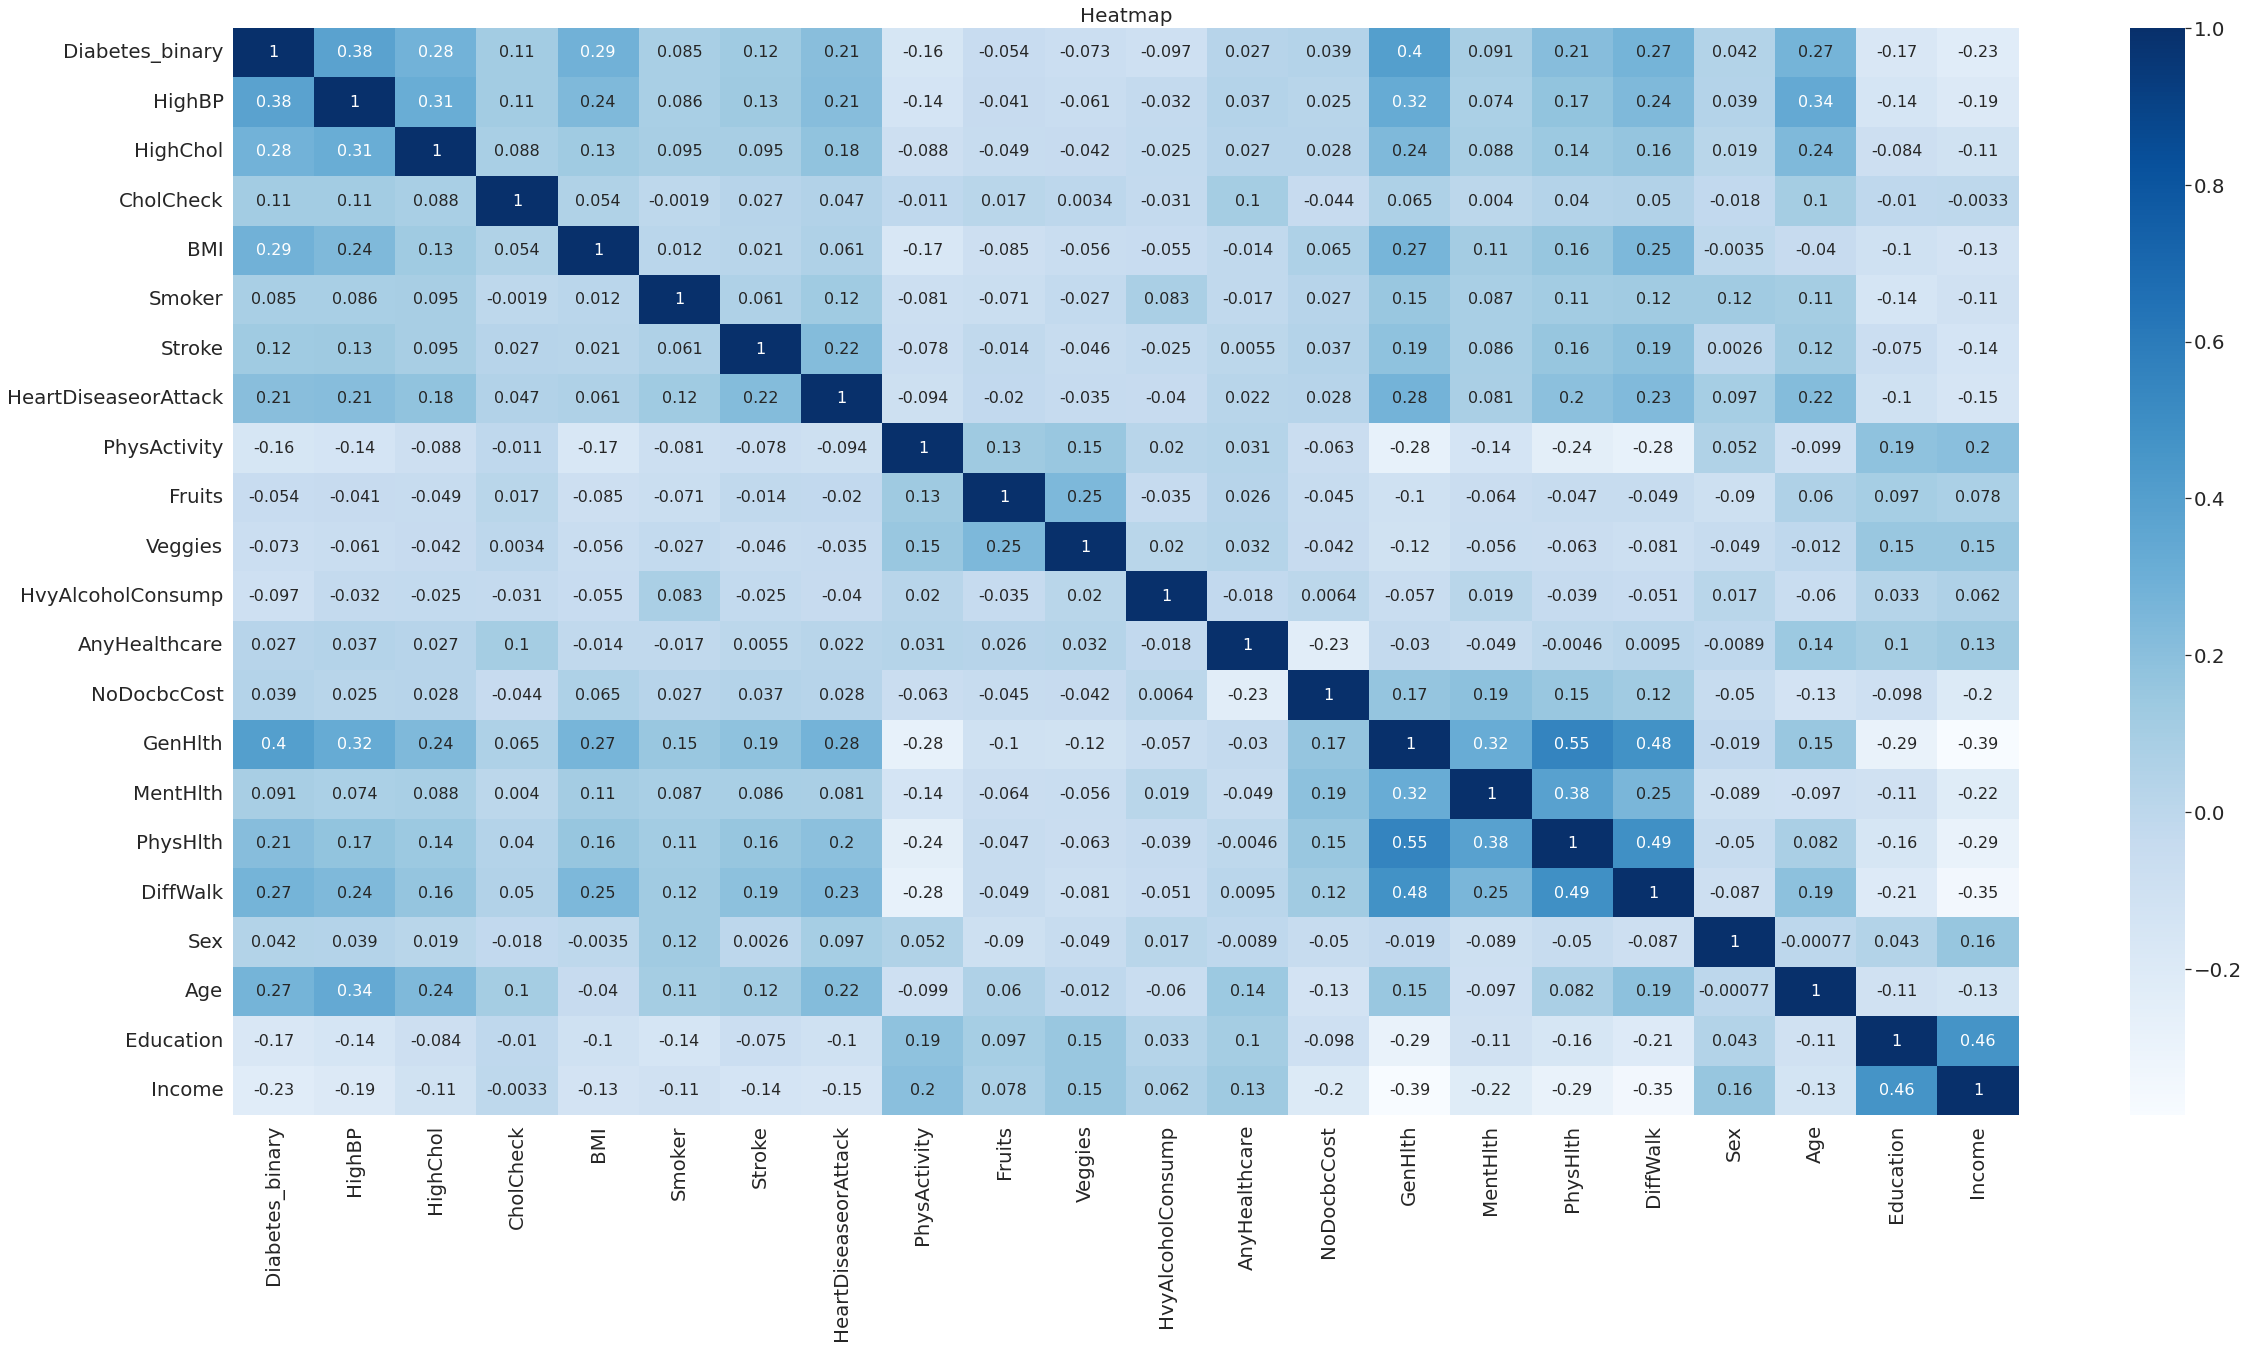

In [8]:
plt.figure(figsize=(40,20))
sns.heatmap(balanced_data.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

#### Correlation


Già eseguita nel notebook sul Clustering

### Classification


In [9]:
x = balanced_data.iloc[:, 1:]
y = balanced_data.iloc[:, 0]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train.value_counts())
print(y_test.value_counts())

(56553, 21)
(14139, 21)
(56553,)
(14139,)
0.0    28297
1.0    28256
Name: Diabetes_binary, dtype: int64
1.0    7090
0.0    7049
Name: Diabetes_binary, dtype: int64


In [11]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs, n_jobs=-1),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True, random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
]

gs_model = []

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

model_results2 = pd.DataFrame()

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [12]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    model_results2[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    gs_model.append(model)

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.74 	 ---> LogisticRegression 
Accuracy: 0.66 	 ---> DecisionTreeClassifier 
Accuracy: 0.74 	 ---> SVC 
Accuracy: 0.71 	 ---> RandomForestClassifier 


Text(0.5, 1.0, 'Cross validation scores')

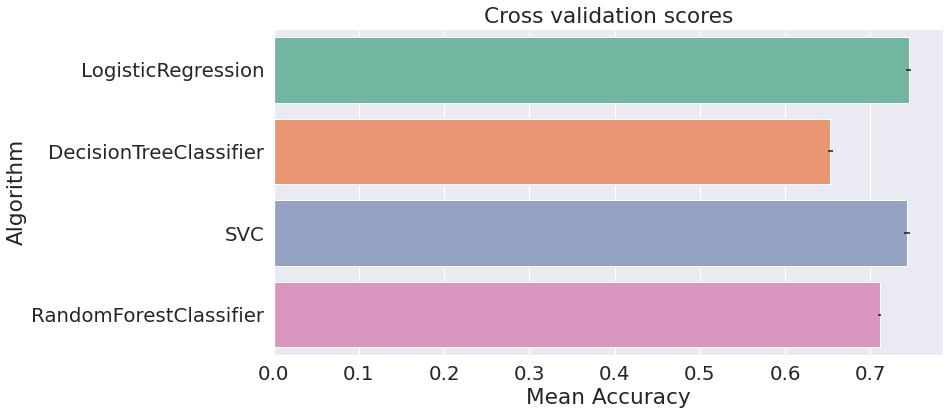

In [13]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

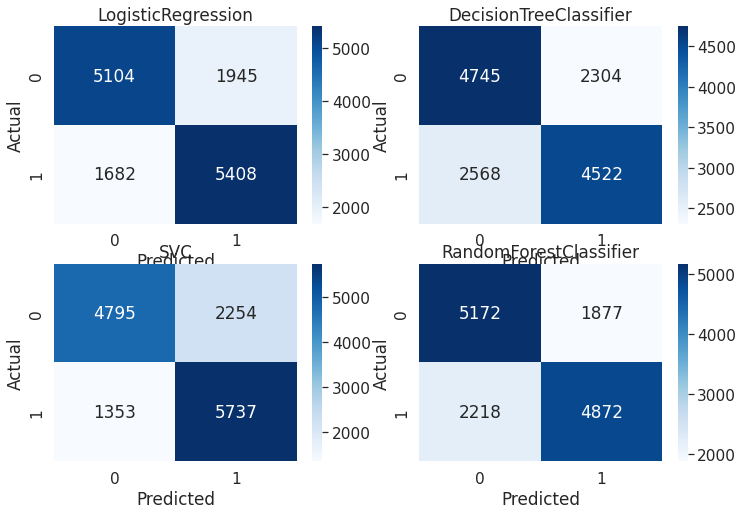

In [14]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(2,2,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [15]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      7049
         1.0       0.74      0.76      0.75      7090

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66      7049
         1.0       0.66      0.64      0.65      7090

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.66     14139
weighted avg       0.66      0.66      0.66     14139

SVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73      7049
         1.0       0.72      0.81      0.76      7090

    accuracy                           0.74     14139
   macro avg 

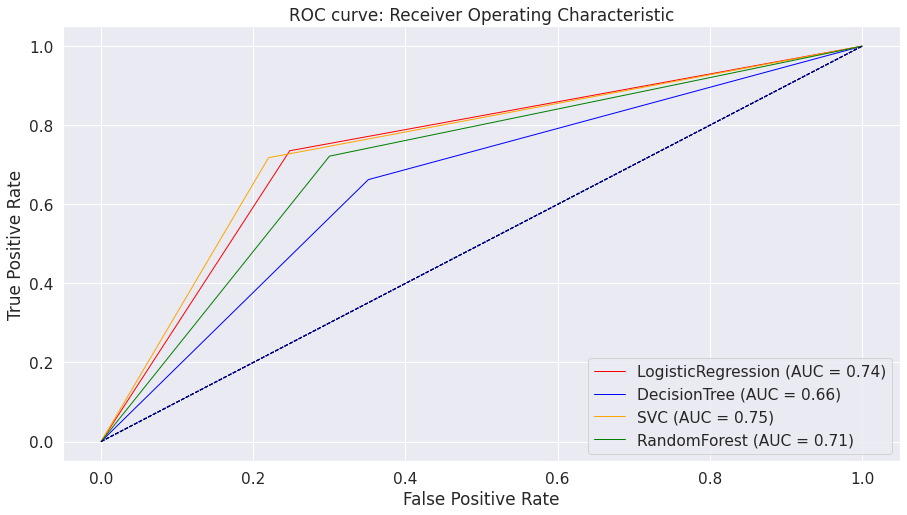

In [16]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [17]:
# Search grid for optimal parameters

DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

RF_param = {"max_depth": [None],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
RFgs = GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, RFgs]

score = []

for model in models:
    model.fit(x_train, y_train)
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)
    print(model.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.7378035434313881
Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.7484130539342585


In [18]:
# scores without gridsearch
print("score without GridSearchCV: ", round(cv_acc[1], 3), round(cv_acc[3], 3))
# scores with gridsearch
print("score with GridSearchCV: ", round(score[0], 3), round(score[1], 3))

score without GridSearchCV:  0.653 0.711
score with GridSearchCV:  0.738 0.748


Text(0.5, 1.0, 'Correlation between models')

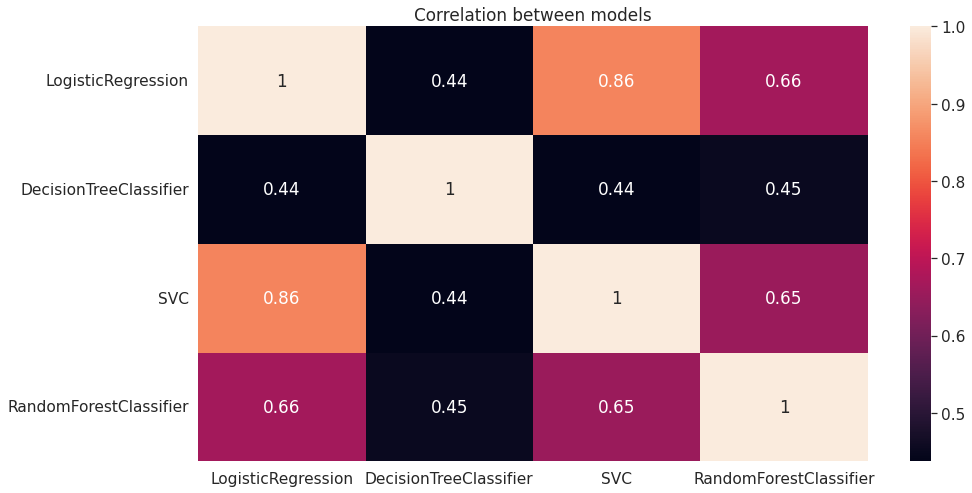

In [19]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
# print(model_results)
sns.heatmap(model_results2.corr(),annot=True)
plt.title("Correlation between models")

## MODEL ENSEMBLE

### VOTING TYPE:

- HARD: uses predicted class labels for majority rule voting
- SOFT: predicts the class label based on the argmax of the sums of the predicted probabilities


0.757


Text(0.5, 1.0, 'Model Ensemble')

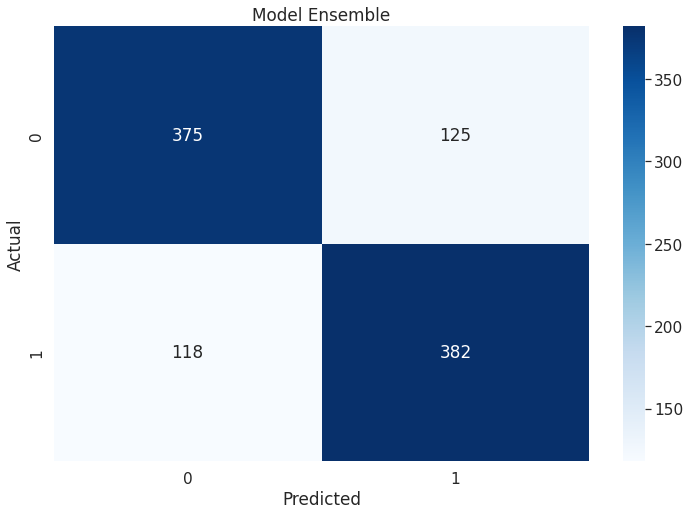

In [20]:
# Do model ensembling
best_model = VotingClassifier(
    estimators=[
        ("lr", gs_model[0]),
        ("svc", gs_model[2]),
        ("dt_gs", gs_model[4]),
        ("rf_gs", gs_model[5]),
    ],
    voting="soft",
    n_jobs=-1,
)
best_model.fit(x_train, y_train)
y_pred_bm = best_model.predict(d2.drop("Diabetes_binary", axis=1))

cm = confusion_matrix(d2["Diabetes_binary"], y_pred_bm)
print(accuracy_score(d2["Diabetes_binary"], y_pred_bm))

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Model Ensemble")


## TEST THE MODEL


In [21]:
diabetes_pred = pd.Series(best_model.predict(d2.drop("Diabetes_binary", axis=1)))
#diabetes_pred = pd.Series(best_model.predict(x_test))
print(diabetes_pred)
print(diabetes_pred.value_counts())

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    0.0
997    0.0
998    0.0
999    1.0
Length: 1000, dtype: float64
1.0    507
0.0    493
dtype: int64


# Yellowbrick


In [22]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve

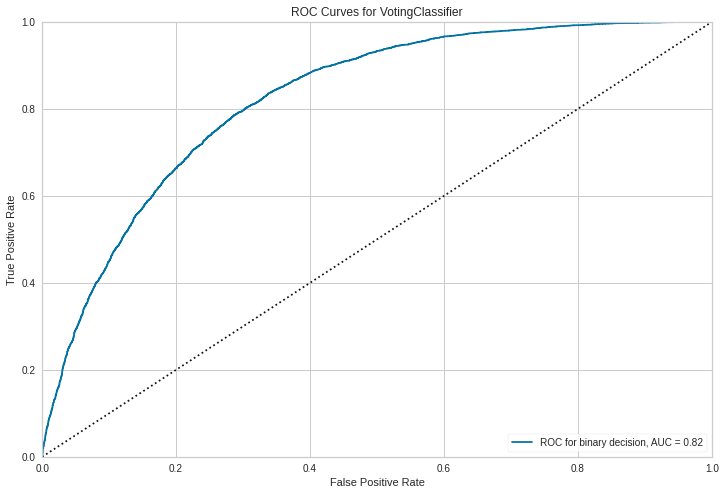

<AxesSubplot:title={'center':'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
# Instantiate the visualizer with the classification model
plt.figure(figsize=(12,8))
visualizer = ROCAUC(best_model, classes=["not_survived", "survived"], micro=False, macro=False, binary=True)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

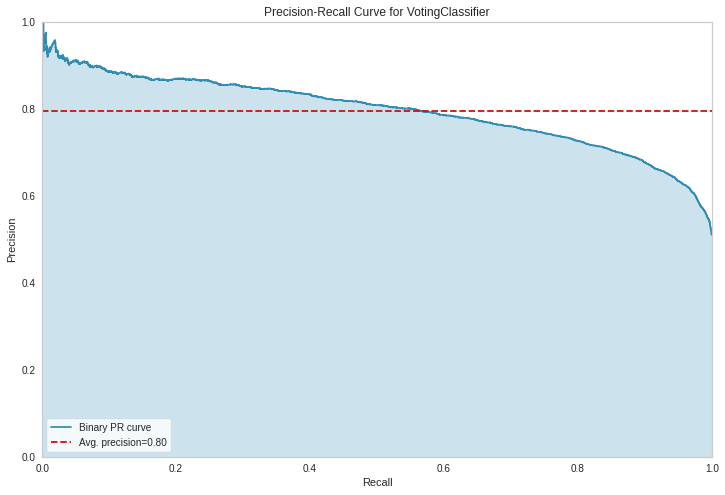

<AxesSubplot:title={'center':'Precision-Recall Curve for VotingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [24]:
plt.figure(figsize=(12,8))
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

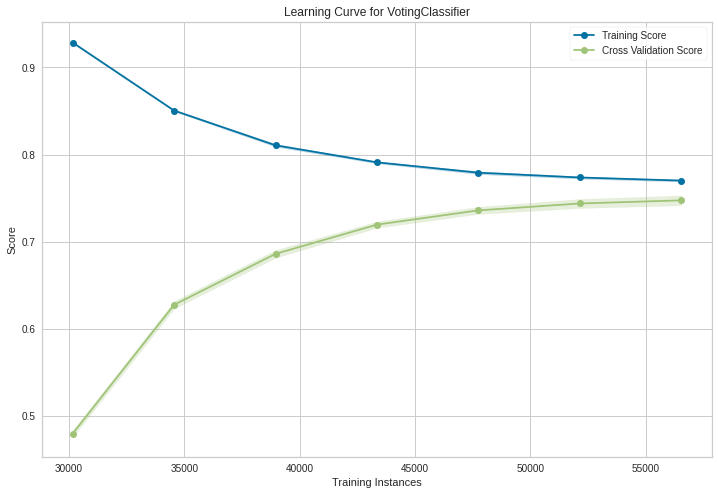

<AxesSubplot:title={'center':'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [25]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

plt.figure(figsize=(12,8))
visualizer = LearningCurve(
    best_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=-1

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Tentativo con dataset più affine


In [26]:
another_try = balanced_data.drop(["Smoker", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "MentHlth", "Sex"], axis=1)
another_d2 = d2.drop(["Smoker", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "MentHlth", "Sex"], axis=1)

x = another_try.iloc[:, 1:]
y = another_try.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train.value_counts())
print(y_test.value_counts())

(56553, 13)
(14139, 13)
(56553,)
(14139,)
0.0    28297
1.0    28256
Name: Diabetes_binary, dtype: int64
1.0    7090
0.0    7049
Name: Diabetes_binary, dtype: int64


In [27]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs, n_jobs=-1),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True, random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
]

gs_model_new = []

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

model_results2 = pd.DataFrame()

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [28]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    model_results2[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    gs_model_new.append(model)

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.74 	 ---> LogisticRegression 
Accuracy: 0.66 	 ---> DecisionTreeClassifier 
Accuracy: 0.74 	 ---> SVC 
Accuracy: 0.7 	 ---> RandomForestClassifier 


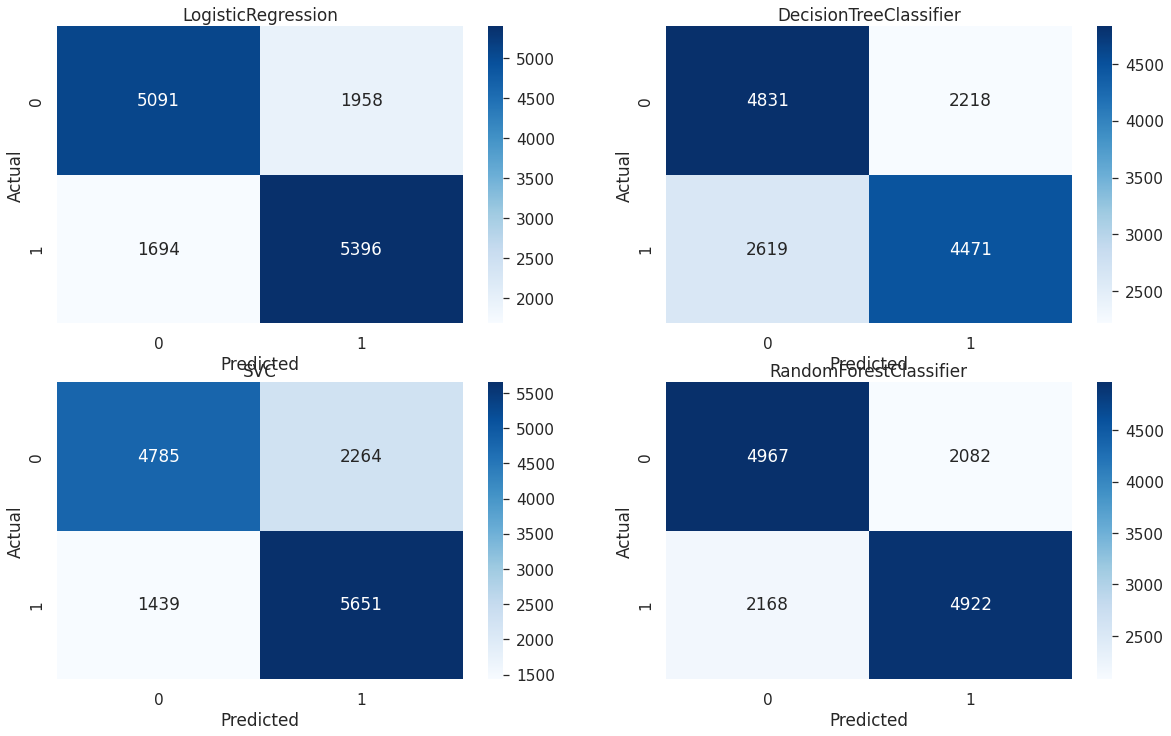

In [29]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,12))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(2,2,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

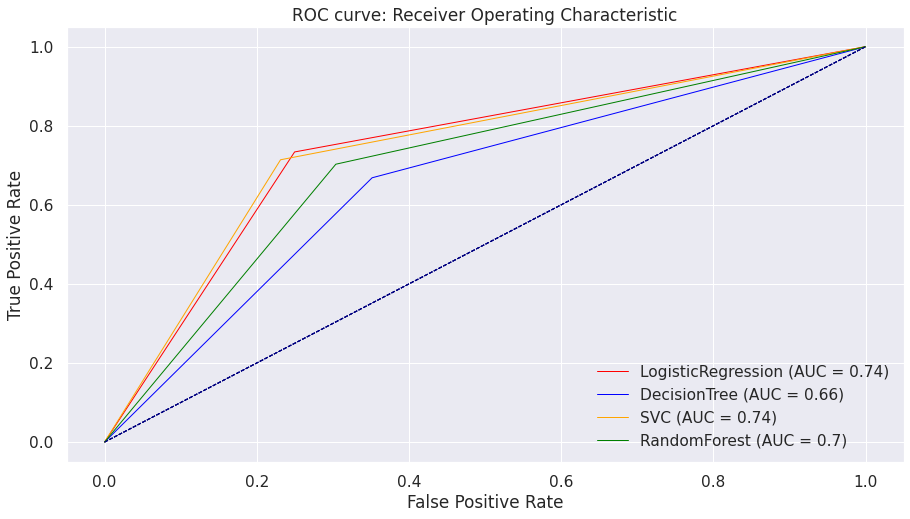

In [30]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [31]:
# Search grid for optimal parameters

DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

RF_param = {"max_depth": [None],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=-1, scoring="accuracy", verbose = 1)
RFgs = GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv=kfold, n_jobs=-1, scoring="accuracy", verbose = 1)

models = [DTgs, RFgs]

score = []

for model in models:
    model.fit(x_train, y_train)
    gs_model_new.append(model.best_estimator_)
    score.append(model.best_score_)
    print(model.best_score_)

# scores without gridsearch
print("score without GridSearchCV: ", round(cv_acc[1], 3), round(cv_acc[3], 3))
# scores with gridsearch
print("score with GridSearchCV: ", round(score[0], 3), round(score[1], 3))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.7373261492591776
Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.7457784035493253
score without GridSearchCV:  0.654 0.7
score with GridSearchCV:  0.737 0.746


Text(0.5, 1.0, 'Correlation between models')

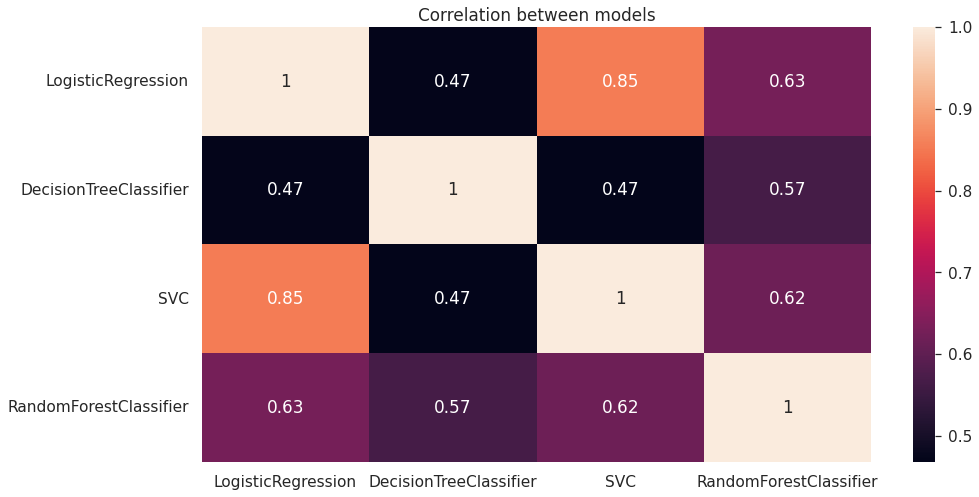

In [32]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
# print(model_results)
sns.heatmap(model_results2.corr(),annot=True)
plt.title("Correlation between models")

In [33]:
# Do model ensembling
best_model = VotingClassifier(
    estimators=[
        ("lr", gs_model_new[0]),
        ("svc", gs_model_new[2]),
        ("dt_gs", gs_model_new[4]),
        ("rf_gs", gs_model_new[5]),
    ],
    voting="soft",
    n_jobs=-1,
)
best_model.fit(x_train,y_train)
y_pred_bm = best_model.predict(another_d2.drop("Diabetes_binary", axis=1))

cm = confusion_matrix(another_d2["Diabetes_binary"], y_pred_bm)
print(accuracy_score(another_d2["Diabetes_binary"], y_pred_bm))

0.747


Text(0.5, 1.0, 'Model Ensemble')

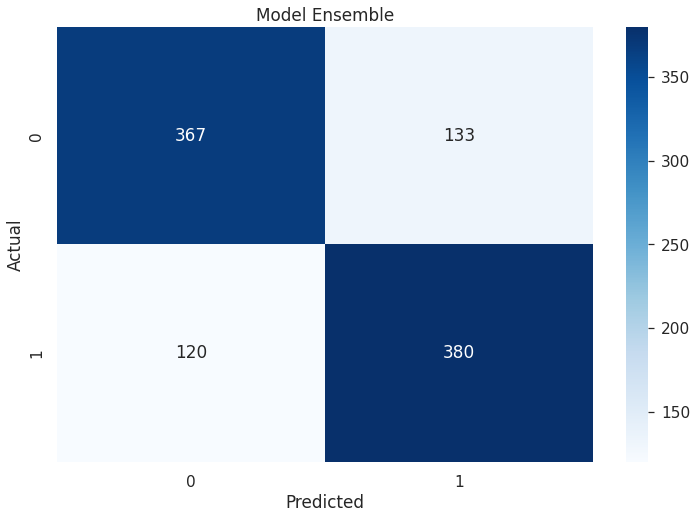

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Model Ensemble')

In [35]:
diabetes_pred = pd.Series(best_model.predict(another_d2.drop("Diabetes_binary", axis=1)))
#diabetes_pred = pd.Series(best_model.predict(x_test))
print(diabetes_pred)
print(diabetes_pred.value_counts())

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    0.0
997    0.0
998    0.0
999    1.0
Length: 1000, dtype: float64
1.0    513
0.0    487
dtype: int64


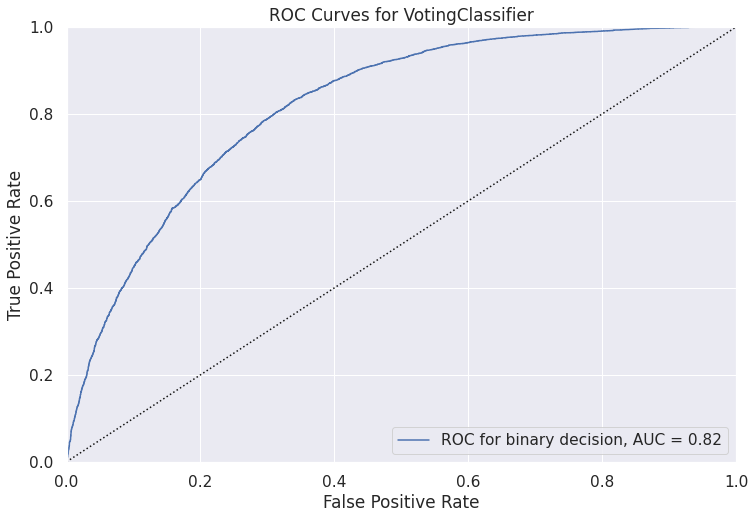

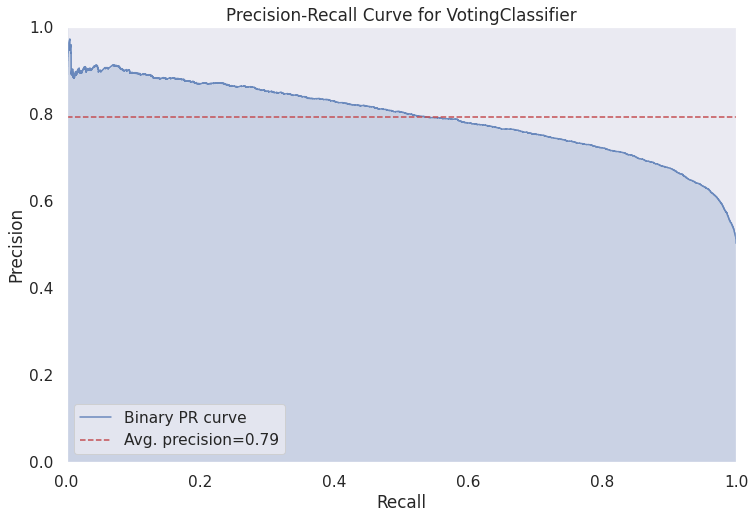

<AxesSubplot:title={'center':'Precision-Recall Curve for VotingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [36]:
# Instantiate the visualizer with the classification model
plt.figure(figsize=(12,8))
visualizer = ROCAUC(best_model, classes=["not_survived", "survived"], micro=False, macro=False, binary=True)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

plt.figure(figsize=(12,8))
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

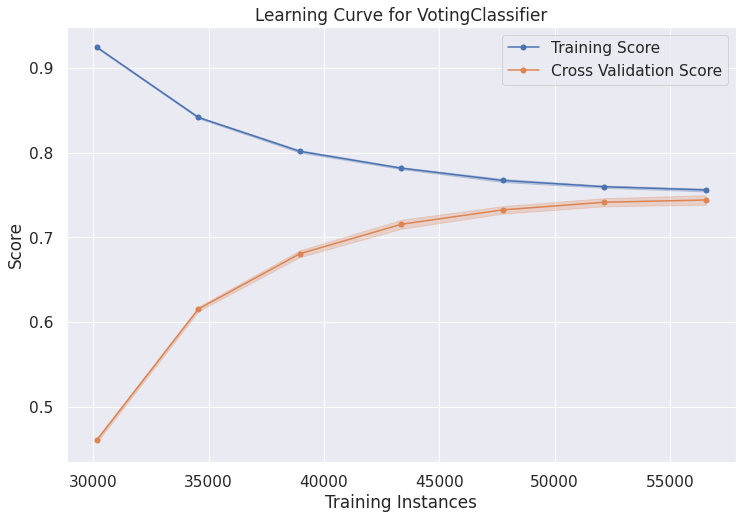

<AxesSubplot:title={'center':'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [37]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

plt.figure(figsize=(12,8))
visualizer = LearningCurve(
    best_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=-1
)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure